In [1]:
import numpy as np
import pandas as pd
from datetime import date,datetime
from dateutil.relativedelta import relativedelta as rd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE
from sklearn.pipeline import make_pipeline
from functools import reduce
import os
pd.set_option('display.max_columns',500)

In [2]:
ruta = '/home/jose/Documentos/bd/stocks/full_history/'

In [3]:
l_arch = os.listdir(ruta)

In [4]:
muestra = pd.DataFrame({'a':l_arch})
muestra  = muestra.sample(200)

In [5]:
muestra = muestra['a'].tolist()

In [6]:
def leer_archivo(arch):
    acc = arch.split('.')[0]
    print(acc)
    df = pd.read_csv(os.path.join(ruta,arch))
    df['date'] = pd.to_datetime(df['date']).dt.date
    df = df.loc[df['date']>=date(2019,1,1)].reset_index(drop=True).assign(accion=acc)
    return df.drop_duplicates().reset_index(drop=True)

In [7]:
df = pd.concat(map(leer_archivo,muestra),ignore_index=True)

CPAC
LIN
ITE
HUSV
IDU
LEJU
RPV
WBT
NWN
ADOM
CHNA
OMP
MVC
OXBRW
DWIN
CRL
TRMK
ALYA
SILJ
CSWI
JASNW
GEF
PEIX
GAIN
FARM
MFINL
WBIB
SLRC
JCI
FBMS
ROX
SAMAW
GOOD
DBEZ
DBEU
ETFC
PCB
BFZ
WBIG
SBM
TQQQ
FYT
VSTO
DK
TOWN
AU
OILK
CRZO
TMCXU
AAN
MCS
NFLT
AGGP
CIZ
JPME
MFEM
ZSL
WEA
NYT
BVAL
BSCK
XUSA
PYT
SMLL
AGNCB
CASS
CLMT
LBRT
GOL
ENSG
BMA
UWT
TBNK
ADNT
FCBP
COMM
CC
OMCL
RUBY
OMER
DYSL
BHGE
JPNL
BSD
PQG
AE
STNLU
JMBS
BPFH
SATS
EWGS
NXN
TOWR
XFLT
USHY
NVEE
HCAC
BNGOW
NGHCP
SCOM
AGLE
RDN
SFLY
MFG
KTF
KEN
NPK
JTD
GWRS
PLND
FSV
UJB
PGF
IBDM
CBS
CRMT
AXDX
INCY
EXPD
AZN
CFBI
GTIP
VOX
AIG
PIO
INXN
JHB
MSG
ESTC
BTN
FIBR
OLED
NEU
HQY
ESGL
IBB
BMRN
SALT
SNFCA
ODC
RILYG
BC
GBR
ARLO
CBAN
GLW
BMI
WABC
MPB
PXLW
EDOG
JMT
PLAG
MDJH
PMOM
MNK
EMD
FTXH
UUUU
MDIV
DEW
ADT
GJO
WFT
NCZ
CHD
FLGE
MYRG
DFBH
SBFG
CAH
KOF
OSCV
APOP
EAST
SSY
TAC
NC
AMJL
NUEM
CUR
AFGH
SCID
LLNW
SIL
CBLK
TMP
IBMO
BDN
MGNX
BRKS
CSD
ADRO
ESGF
TISA
FIYY
SOHU
QQEW
SAUC
PBD


In [8]:
df.shape,df.drop_duplicates().shape

((14485, 8), (14485, 8))

In [9]:
fhi = df.date.min()
fhf = df.date.max()
fhi,fhf

(datetime.date(2019, 1, 2), datetime.date(2019, 4, 18))

In [10]:
catfh = df[['date']].drop_duplicates()
catfh.sort_values(by='date',ascending=True,inplace=True)
catfh.reset_index(drop=True,inplace=True)
catfh['id_fh'] = catfh.index.map(lambda x:x+1)
catfh

,date,id_fh
0,2019-01-02,1
1,2019-01-03,2
2,2019-01-04,3
3,2019-01-07,4
4,2019-01-08,5
...,...,...
70,2019-04-12,71
71,2019-04-15,72
72,2019-04-16,73
73,2019-04-17,74


In [11]:
df = df.merge(catfh,on='date',how='inner')
df.drop('date',axis=1,inplace=True)  
df.head()

,volume,open,close,high,low,adjclose,accion,id_fh
0,7000,10.450000,9.900000,10.450000,9.810000,9.900000,CPAC,75
1,1547300,180.119995,180.399994,180.789993,179.669998,180.399994,LIN,75
2,62600,59.900002,59.910000,59.930000,59.869999,59.910000,ITE,75
3,16900,25.070000,25.104000,25.150000,25.062000,25.104000,HUSV,75
4,35600,145.380005,145.029999,145.949997,145.020004,145.029999,IDU,75


In [12]:
fhi = df.id_fh.min() 
fhf = df.id_fh.max()
vobs = 15
vdes = 1
anclai = fhi+vobs-1
anclaf = fhf-vdes
varc = ['volume', 'open', 'close', 'high', 'low', 'adjclose']
um = ['accion','ancla']

In [13]:
df[varc] = df[varc].astype(float)

In [14]:
anclai,anclaf

(15, 74)

In [15]:
def trans(ancla):
    print(ancla)
    li= ancla-vobs+1
    aux = df.loc[(df['id_fh']>=li)&(df['id_fh']<=ancla)].reset_index(drop=True).copy()
    aux['id_fh'].replace(dict(zip(reversed(sorted(aux.id_fh.unique())),range(1,vobs+1))),inplace=True)
    aux['ancla'] = ancla
    aux = aux.pivot_table(index=um,columns=['id_fh'],values=varc,aggfunc='sum')
    aux.columns = [x+'_'+str(y) for x,y in aux.columns]
    return aux

In [16]:
def estab_var(df,v,k):
    print(v,k)
    var = ['%s_%d'%(v,i+1) for i in range(k)]
    aux = df[var].copy()
    aux['v_media_%s_%d'%(v,k)] = aux[var].mean(axis=1)
    aux['v_mediana_%s_%d'%(v,k)] = aux[var].median(axis=1)
    aux['v_std_%s_%d'%(v,k)] = aux[var].std(axis=1)
    aux['v_min_%s_%d'%(v,k)] = aux[var].min(axis=1)
    aux['v_max_%s_%d'%(v,k)] = aux[var].max(axis=1)
    return aux.drop(var,axis=1)

In [17]:
X = pd.concat(map(lambda ancla:reduce(lambda x,y:pd.merge(x,y,left_index=True,right_index=True,how='outer'),
       map(lambda z:estab_var(trans(ancla),*z),[(v,k) for v in varc for k in [5,10,15]])).reset_index(),
range(anclai,anclaf+1)),ignore_index=True)

15
volume 5
15
volume 10
15
volume 15
15
open 5
15
open 10
15
open 15
15
close 5
15
close 10
15
close 15
15
high 5
15
high 10
15
high 15
15
low 5
15
low 10
15
low 15
15
adjclose 5
15
adjclose 10
15
adjclose 15
16
volume 5
16
volume 10
16
volume 15
16
open 5
16
open 10
16
open 15
16
close 5
16
close 10
16
close 15
16
high 5
16
high 10
16
high 15
16
low 5
16
low 10
16
low 15
16
adjclose 5
16
adjclose 10
16
adjclose 15
17
volume 5
17
volume 10
17
volume 15
17
open 5
17
open 10
17
open 15
17
close 5
17
close 10
17
close 15
17
high 5
17
high 10
17
high 15
17
low 5
17
low 10
17
low 15
17
adjclose 5
17
adjclose 10
17
adjclose 15
18
volume 5
18
volume 10
18
volume 15
18
open 5
18
open 10
18
open 15
18
close 5
18
close 10
18
close 15
18
high 5
18
high 10
18
high 15
18
low 5
18
low 10
18
low 15
18
adjclose 5
18
adjclose 10
18
adjclose 15
19
volume 5
19
volume 10
19
volume 15
19
open 5
19
open 10
19
open 15
19
close 5
19
close 10
19
close 15
19
high 5
19
high 10
19
high 15
19
low 5
19
low 10
19
l

open 10
54
open 15
54
close 5
54
close 10
54
close 15
54
high 5
54
high 10
54
high 15
54
low 5
54
low 10
54
low 15
54
adjclose 5
54
adjclose 10
54
adjclose 15
55
volume 5
55
volume 10
55
volume 15
55
open 5
55
open 10
55
open 15
55
close 5
55
close 10
55
close 15
55
high 5
55
high 10
55
high 15
55
low 5
55
low 10
55
low 15
55
adjclose 5
55
adjclose 10
55
adjclose 15
56
volume 5
56
volume 10
56
volume 15
56
open 5
56
open 10
56
open 15
56
close 5
56
close 10
56
close 15
56
high 5
56
high 10
56
high 15
56
low 5
56
low 10
56
low 15
56
adjclose 5
56
adjclose 10
56
adjclose 15
57
volume 5
57
volume 10
57
volume 15
57
open 5
57
open 10
57
open 15
57
close 5
57
close 10
57
close 15
57
high 5
57
high 10
57
high 15
57
low 5
57
low 10
57
low 15
57
adjclose 5
57
adjclose 10
57
adjclose 15
58
volume 5
58
volume 10
58
volume 15
58
open 5
58
open 10
58
open 15
58
close 5
58
close 10
58
close 15
58
high 5
58
high 10
58
high 15
58
low 5
58
low 10
58
low 15
58
adjclose 5
58
adjclose 10
58
adjclose 15
5

In [18]:
X.head()

,accion,ancla,v_media_volume_5,v_mediana_volume_5,v_std_volume_5,v_min_volume_5,v_max_volume_5,v_media_volume_10,v_mediana_volume_10,v_std_volume_10,v_min_volume_10,v_max_volume_10,v_media_volume_15,v_mediana_volume_15,v_std_volume_15,v_min_volume_15,v_max_volume_15,v_media_open_5,v_mediana_open_5,v_std_open_5,v_min_open_5,v_max_open_5,v_media_open_10,v_mediana_open_10,v_std_open_10,v_min_open_10,v_max_open_10,v_media_open_15,v_mediana_open_15,v_std_open_15,v_min_open_15,v_max_open_15,v_media_close_5,v_mediana_close_5,v_std_close_5,v_min_close_5,v_max_close_5,v_media_close_10,v_mediana_close_10,v_std_close_10,v_min_close_10,v_max_close_10,v_media_close_15,v_mediana_close_15,v_std_close_15,v_min_close_15,v_max_close_15,v_media_high_5,v_mediana_high_5,v_std_high_5,v_min_high_5,v_max_high_5,v_media_high_10,v_mediana_high_10,v_std_high_10,v_min_high_10,v_max_high_10,v_media_high_15,v_mediana_high_15,v_std_high_15,v_min_high_15,v_max_high_15,v_media_low_5,v_mediana_low_5,v_std_low_5,v_min_low_5,v_max_low_5,v_media_low_10,v_mediana_low_10,v_std_low_10,v_min_low_10,v_max_low_10,v_media_low_15,v_mediana_low_15,v_std_low_15,v_min_low_15,v_max_low_15,v_media_adjclose_5,v_mediana_adjclose_5,v_std_adjclose_5,v_min_adjclose_5,v_max_adjclose_5,v_media_adjclose_10,v_mediana_adjclose_10,v_std_adjclose_10,v_min_adjclose_10,v_max_adjclose_10,v_media_adjclose_15,v_mediana_adjclose_15,v_std_adjclose_15,v_min_adjclose_15,v_max_adjclose_15
0,AAN,15,462380.0,444200.0,80885.332416,380800.0,587700.0,424430.0,427050.0,90738.342379,281300.0,587700.0,4.661667e+05,444200.0,1.372950e+05,281300.0,789600.0,47.3380,47.630001,0.938893,46.009998,48.23,46.6990,46.299999,0.935182,45.689999,48.23,45.600666,46.009998,1.937924,41.340,48.23,47.693999,47.540001,0.590322,46.980000,48.439999,46.9860,46.735001,0.855520,45.970001,48.439999,46.024000,46.340000,1.665309,42.759998,48.439999,48.3200,48.570000,0.799749,47.270000,49.049999,47.5310,47.160,0.999960,46.400002,49.049999,46.522000,46.740002,1.766065,43.470001,49.049999,46.917999,47.040001,0.854528,45.700001,47.919998,46.293999,45.9000,0.888296,45.389999,47.919998,45.105333,45.700001,1.991994,41.209999,47.919998,47.661694,47.507801,0.589922,46.948177,48.407188,46.954174,46.703344,0.854941,45.938862,48.407188,45.992826,46.308613,1.664181,42.731033,48.407188
1,ADNT,15,2803400.0,2524600.0,731358.639793,1946800.0,3828800.0,2846340.0,2780550.0,731730.046154,1939200.0,3950200.0,3.254680e+06,3036500.0,1.223899e+06,1939200.0,6358100.0,17.8260,17.780001,1.191650,16.540001,19.59,18.1630,18.090000,0.969536,16.540001,19.59,17.264000,17.780001,1.593589,14.800,19.59,18.370000,18.170000,0.912004,17.389999,19.780001,18.4900,18.360000,0.706683,17.389999,19.780001,17.685333,18.049999,1.436722,15.180000,19.780001,18.9820,18.540001,0.773253,18.219999,19.900000,19.1050,19.110,0.610814,18.219999,19.900000,18.234000,18.540001,1.456762,15.780000,19.900000,17.510000,17.420000,0.833277,16.490000,18.530001,17.738500,17.8525,0.655507,16.490000,18.570000,16.913533,17.420000,1.409549,14.518000,18.570000,18.370000,18.170000,0.912004,17.389999,19.780001,18.490000,18.360000,0.706683,17.389999,19.780001,17.685333,18.049999,1.436722,15.180000,19.780001
2,ADOM,15,229700.0,213500.0,105726.061120,110200.0,356800.0,276520.0,265550.0,122859.348670,110200.0,444500.0,2.451333e+05,213500.0,1.133270e+05,109100.0,444500.0,0.2746,0.273000,0.013722,0.255000,0.29,0.2876,0.287500,0.022974,0.255000,0.33,0.292200,0.294000,0.020432,0.255,0.33,0.255000,0.255000,0.011180,0.240000,0.270000,0.2737,0.268000,0.028752,0.240000,0.330000,0.283667,0.274000,0.027894,0.240000,0.330000,0.2792,0.280000,0.008871,0.268000,0.290000,0.3044,0.295,0.033778,0.268000,0.378000,0.309467,0.318000,0.028084,0.268000,0.378000,0.246400,0.244000,0.018876,0.223000,0.270000,0.259700,0.2600,0.023509,0.223000,0.300000,0.266067,0.270000,0.021195,0.223000,0.300000,0.255000,0.255000,0.011180,0.240000,0.270000,0.273700,0.268000,0.028752,0.240000,0.330000,0.283667,0.274000,0.027894,0.240000,0.330000
3,ADRO

In [19]:
X.shape

(11597, 92)

In [20]:
aux = df[['id_fh','accion','close']].copy()
aux.head()

,id_fh,accion,close
0,75,CPAC,9.900000
1,75,LIN,180.399994
2,75,ITE,59.910000
3,75,HUSV,25.104000
4,75,IDU,145.029999


In [21]:

aux.id_fh.min()

1

In [22]:
aux = aux.assign(fhf=aux['id_fh']-1)

In [23]:
aux = aux.merge(aux,left_on=['id_fh','accion'],right_on=['fhf','accion'],how='inner').reset_index(drop=True)

In [24]:
aux['sube'] =( aux['close_x']<aux['close_y']).astype(int)

In [25]:
aux = aux[['id_fh_x','accion','sube']].rename(columns={'id_fh_x':'ancla'})

In [26]:
X = X.merge(aux,on=um,how='inner')

In [27]:
X.head()

,accion,ancla,v_media_volume_5,v_mediana_volume_5,v_std_volume_5,v_min_volume_5,v_max_volume_5,v_media_volume_10,v_mediana_volume_10,v_std_volume_10,v_min_volume_10,v_max_volume_10,v_media_volume_15,v_mediana_volume_15,v_std_volume_15,v_min_volume_15,v_max_volume_15,v_media_open_5,v_mediana_open_5,v_std_open_5,v_min_open_5,v_max_open_5,v_media_open_10,v_mediana_open_10,v_std_open_10,v_min_open_10,v_max_open_10,v_media_open_15,v_mediana_open_15,v_std_open_15,v_min_open_15,v_max_open_15,v_media_close_5,v_mediana_close_5,v_std_close_5,v_min_close_5,v_max_close_5,v_media_close_10,v_mediana_close_10,v_std_close_10,v_min_close_10,v_max_close_10,v_media_close_15,v_mediana_close_15,v_std_close_15,v_min_close_15,v_max_close_15,v_media_high_5,v_mediana_high_5,v_std_high_5,v_min_high_5,v_max_high_5,v_media_high_10,v_mediana_high_10,v_std_high_10,v_min_high_10,v_max_high_10,v_media_high_15,v_mediana_high_15,v_std_high_15,v_min_high_15,v_max_high_15,v_media_low_5,v_mediana_low_5,v_std_low_5,v_min_low_5,v_max_low_5,v_media_low_10,v_mediana_low_10,v_std_low_10,v_min_low_10,v_max_low_10,v_media_low_15,v_mediana_low_15,v_std_low_15,v_min_low_15,v_max_low_15,v_media_adjclose_5,v_mediana_adjclose_5,v_std_adjclose_5,v_min_adjclose_5,v_max_adjclose_5,v_media_adjclose_10,v_mediana_adjclose_10,v_std_adjclose_10,v_min_adjclose_10,v_max_adjclose_10,v_media_adjclose_15,v_mediana_adjclose_15,v_std_adjclose_15,v_min_adjclose_15,v_max_adjclose_15,sube
0,AAN,15,462380.0,444200.0,80885.332416,380800.0,587700.0,424430.0,427050.0,90738.342379,281300.0,587700.0,4.661667e+05,444200.0,1.372950e+05,281300.0,789600.0,47.3380,47.630001,0.938893,46.009998,48.23,46.6990,46.299999,0.935182,45.689999,48.23,45.600666,46.009998,1.937924,41.340,48.23,47.693999,47.540001,0.590322,46.980000,48.439999,46.9860,46.735001,0.855520,45.970001,48.439999,46.024000,46.340000,1.665309,42.759998,48.439999,48.3200,48.570000,0.799749,47.270000,49.049999,47.5310,47.160,0.999960,46.400002,49.049999,46.522000,46.740002,1.766065,43.470001,49.049999,46.917999,47.040001,0.854528,45.700001,47.919998,46.293999,45.9000,0.888296,45.389999,47.919998,45.105333,45.700001,1.991994,41.209999,47.919998,47.661694,47.507801,0.589922,46.948177,48.407188,46.954174,46.703344,0.854941,45.938862,48.407188,45.992826,46.308613,1.664181,42.731033,48.407188,1
1,ADNT,15,2803400.0,2524600.0,731358.639793,1946800.0,3828800.0,2846340.0,2780550.0,731730.046154,1939200.0,3950200.0,3.254680e+06,3036500.0,1.223899e+06,1939200.0,6358100.0,17.8260,17.780001,1.191650,16.540001,19.59,18.1630,18.090000,0.969536,16.540001,19.59,17.264000,17.780001,1.593589,14.800,19.59,18.370000,18.170000,0.912004,17.389999,19.780001,18.4900,18.360000,0.706683,17.389999,19.780001,17.685333,18.049999,1.436722,15.180000,19.780001,18.9820,18.540001,0.773253,18.219999,19.900000,19.1050,19.110,0.610814,18.219999,19.900000,18.234000,18.540001,1.456762,15.780000,19.900000,17.510000,17.420000,0.833277,16.490000,18.530001,17.738500,17.8525,0.655507,16.490000,18.570000,16.913533,17.420000,1.409549,14.518000,18.570000,18.370000,18.170000,0.912004,17.389999,19.780001,18.490000,18.360000,0.706683,17.389999,19.780001,17.685333,18.049999,1.436722,15.180000,19.780001,1
2,ADOM,15,229700.0,213500.0,105726.061120,110200.0,356800.0,276520.0,265550.0,122859.348670,110200.0,444500.0,2.451333e+05,213500.0,1.133270e+05,109100.0,444500.0,0.2746,0.273000,0.013722,0.255000,0.29,0.2876,0.287500,0.022974,0.255000,0.33,0.292200,0.294000,0.020432,0.255,0.33,0.255000,0.255000,0.011180,0.240000,0.270000,0.2737,0.268000,0.028752,0.240000,0.330000,0.283667,0.274000,0.027894,0.240000,0.330000,0.2792,0.280000,0.008871,0.268000,0.290000,0.3044,0.295,0.033778,0.268000,0.378000,0.309467,0.318000,0.028084,0.268000,0.378000,0.246400,0.244000,0.018876,0.223000,0.270000,0.259700,0.2600,0.023509,0.223000,0.300000,0.266067,0.270000,0.021195,0.223000,0.300000,0.255000,0.255000,0.011180,0.240000,0.270000,0.273700,0.268000,0.028752,0.240000,0.330000,0.283667,0.274000,0.027894,0.240000,0.3300

In [28]:
X.shape

(11588, 93)

In [29]:
X.groupby(um).count().max().max()

1

In [30]:
varc = X.filter(like='v_').columns.tolist()

In [31]:
len(varc)

90

In [32]:
miss = 1-X[varc].describe().T[['count']]/len(X)
miss = miss.loc[miss['count']>0]
len(miss)

18

In [33]:
X = X.dropna().reset_index(drop=True)

In [34]:
aux = X[varc].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index()

In [35]:
def extremo(df,v,li,ls):
    aux = df[um+[v]].copy()
    aux['ol_%s'%v] = ((aux[v]<li)|(aux[v]>ls)).astype(int)
    return aux.drop(v,axis=1)

In [36]:
ol = reduce(lambda x,y:pd.merge(x,y,on=um,how='outer'),map(lambda z:extremo(X,*z),aux.values.tolist()))

In [37]:
X.shape,ol.shape

((11586, 93), (11586, 92))

In [38]:
X = X.loc[(1-ol.filter(like='ol_').max(axis=1)).astype(bool)].reset_index(drop=True)

array([[<AxesSubplot:title={'center':'ancla'}>,
        <AxesSubplot:title={'center':'v_media_volume_5'}>,
        <AxesSubplot:title={'center':'v_mediana_volume_5'}>,
        <AxesSubplot:title={'center':'v_std_volume_5'}>,
        <AxesSubplot:title={'center':'v_min_volume_5'}>,
        <AxesSubplot:title={'center':'v_max_volume_5'}>,
        <AxesSubplot:title={'center':'v_media_volume_10'}>,
        <AxesSubplot:title={'center':'v_mediana_volume_10'}>,
        <AxesSubplot:title={'center':'v_std_volume_10'}>,
        <AxesSubplot:title={'center':'v_min_volume_10'}>],
       [<AxesSubplot:title={'center':'v_max_volume_10'}>,
        <AxesSubplot:title={'center':'v_media_volume_15'}>,
        <AxesSubplot:title={'center':'v_mediana_volume_15'}>,
        <AxesSubplot:title={'center':'v_std_volume_15'}>,
        <AxesSubplot:title={'center':'v_min_volume_15'}>,
        <AxesSubplot:title={'center':'v_max_volume_15'}>,
        <AxesSubplot:title={'center':'v_media_open_5'}>,
        <Ax

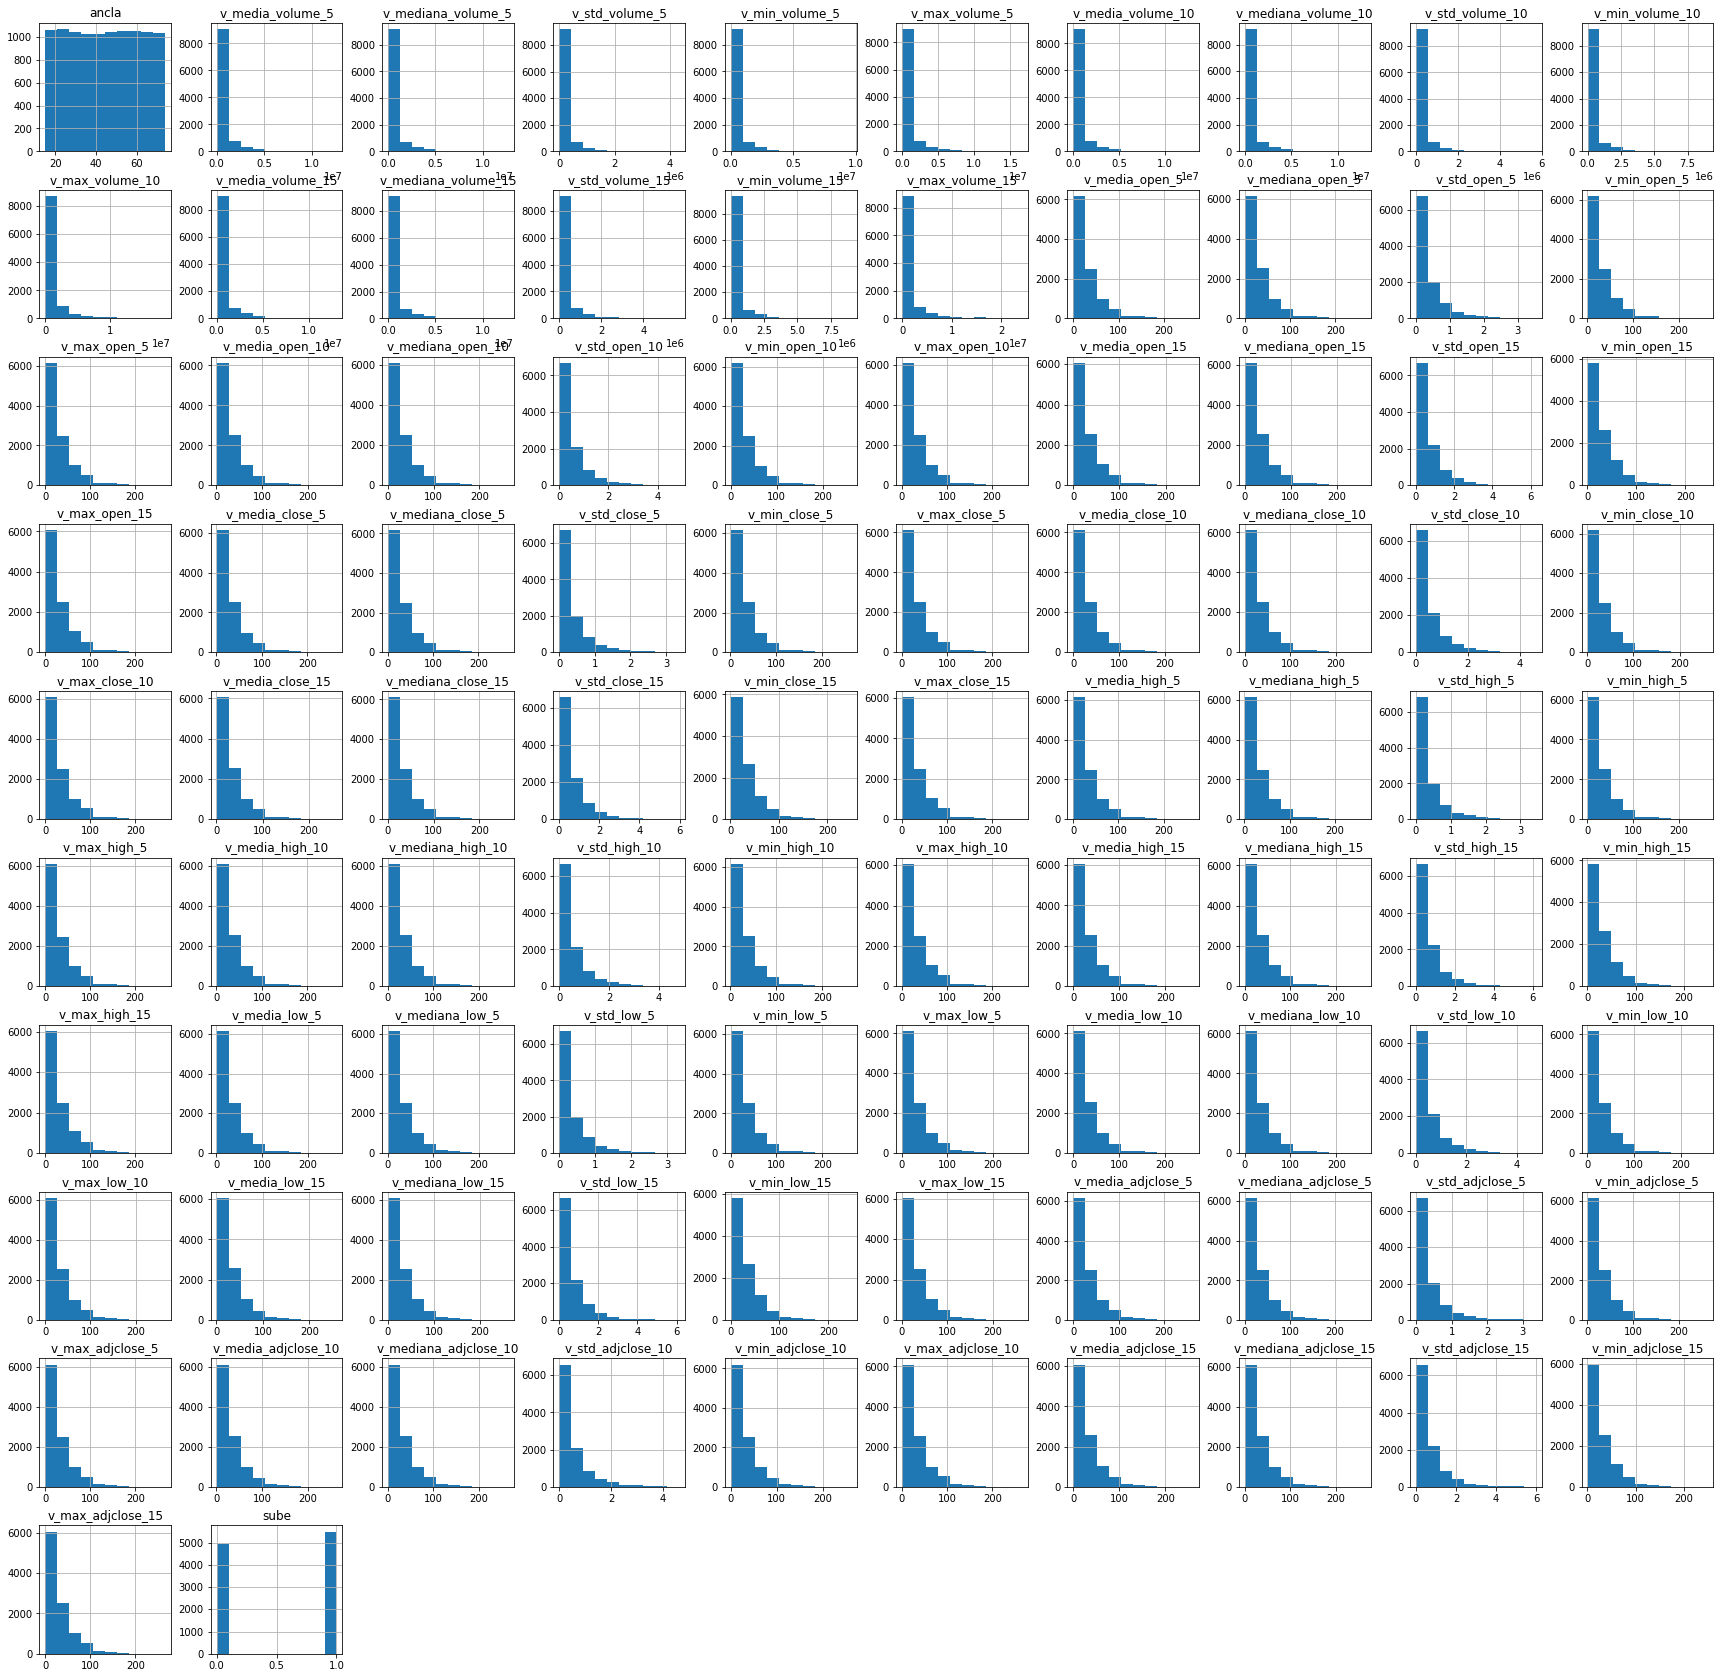

In [39]:
X.hist(figsize=(30,30))

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS,TSNE
from sklearn.pipeline import make_pipeline
import seaborn as sns

In [41]:
pi = make_pipeline(StandardScaler(),PCA(n_components=2))

In [42]:
Xp = pd.DataFrame(pi.fit_transform(X[varc]),columns=['d1','d2'])

In [43]:
pi.steps[-1][-1].explained_variance_ratio_.cumsum()

array([0.74964522, 0.90350033])

In [44]:
Xp['sube'] = X['sube']

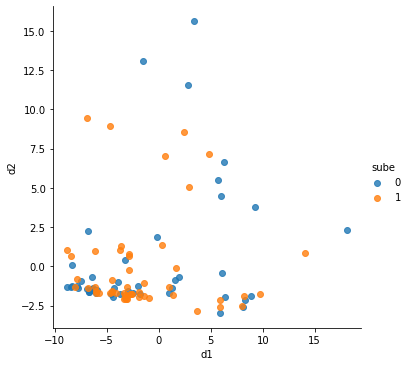

In [45]:
sns.lmplot(data=Xp.sample(100),x='d1',y='d2',hue='sube',fit_reg=False)

In [46]:
mds = MDS(n_components=2,n_jobs=-1)
tsne = TSNE(n_components=2,n_jobs=-1)

In [47]:
Xs = X.sample(frac=0.05).reset_index(drop=True)

In [49]:
Xs.shape

(521, 93)

In [50]:

Xm = pd.DataFrame(mds.fit_transform(Xs[varc]),columns=['d1','d2'])
Xt = pd.DataFrame(tsne.fit_transform(Xs[varc]),columns=['d1','d2'])
Xm['sube'] = Xt['sube'] = X['sube']

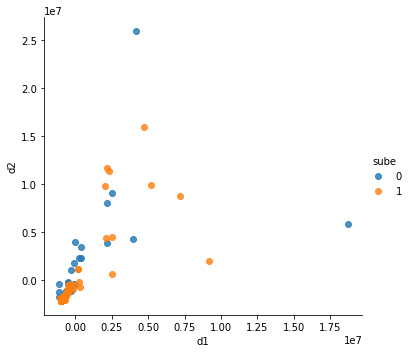

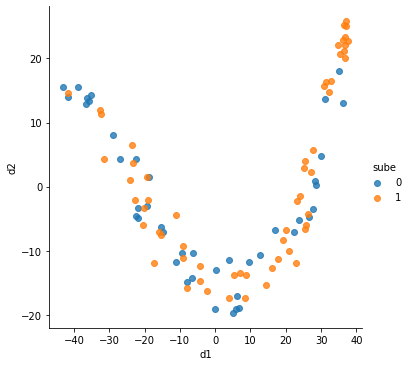

In [51]:
sns.lmplot(data=Xm.sample(100),x='d1',y='d2',hue='sube',fit_reg=False)
sns.lmplot(data=Xt.sample(100),x='d1',y='d2',hue='sube',fit_reg=False)